# Extraction, transform y load de la data base

### Se importan las librerias a ser utilizadas en el proceso etl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from category_encoders import OneHotEncoder

### Se importa la data base

In [2]:
car_data = pd.read_csv("CarDekho.csv")

### Se eliminan columnas que no van a ser manejadas en el modelo, se realiza en este punto para que no afecte en los procesos siguientes.

## Tratamiento de valores faltantes

In [3]:
car_data = car_data.drop(['Max Power','Max Torque'], axis=1)

In [4]:
car_data_notna = car_data.copy()
car_data_fill_na = car_data.copy()

### Se crea un dataframe done se dropearon los valores nulos, para luego ser evaluado en el modelo

In [5]:
car_data_notna = car_data_notna.dropna()

### Se crea otro dataframe pero en lugar de dropear los valores nulos, se llenan con la media para variables continuas y con la moda para variables categoricas

In [6]:
car_data_fill_na = car_data_fill_na.fillna(car_data.mean())

TypeError: can only concatenate str (not "int") to str

In [ ]:
for column in ["Length","Width","Height","Seating Capacity","Fuel Tank Capacity"]:
    car_data_fill_na[column] = car_data_fill_na[column].round(0)

for column in ["Engine","Drivetrain"]:
    mode = str(car_data_fill_na[column].mode())
    car_data_fill_na[column] = car_data_fill_na[column].replace(np.NaN, mode)

## Normalizacion de valores y tratamiento de outliers

### En el siguiente grafico se puede apreciar la diferencia ene escala numerica entre precio y las otras variables, por lo que se normalizaran para que esten en la misma escala y sean mas faciles de manejar. Ademas, se retiran los outliers de la columna precio para analizar el comportamiento en el modelo.

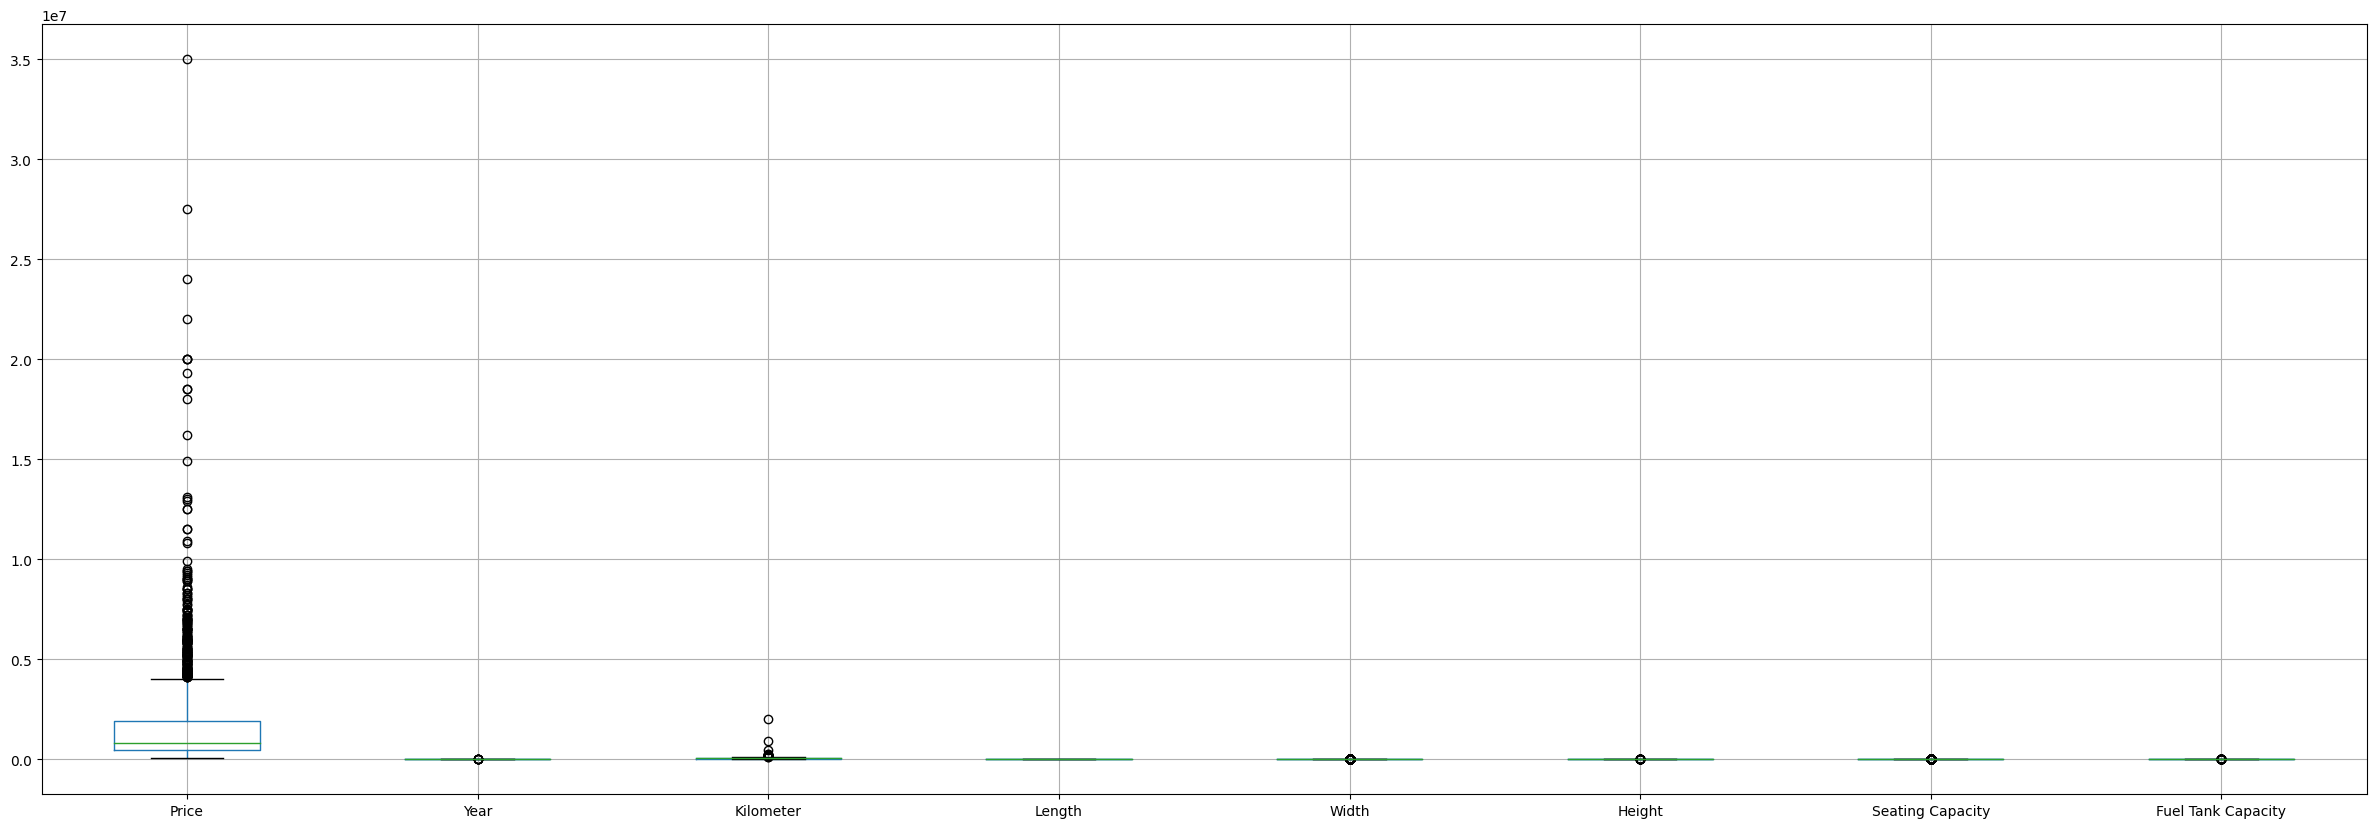

In [ ]:
car_data.boxplot(figsize=(30,10))
plt.savefig(os.path.join("graficos", "boxplot_sin_normalizar.png"))
plt.show()

### Tratamiento de outliers

In [ ]:
car_data_fill_na_no_outliers = car_data_fill_na.copy()
car_data_notna_no_outliers = car_data_notna.copy()

In [ ]:
iqr = np.percentile(car_data_fill_na_no_outliers['Price'], 75) - np.percentile(car_data_fill_na_no_outliers['Price'], 25)
upper_outlier_bound = np.percentile(car_data_fill_na_no_outliers['Price'], 75) + 1.5 * iqr
lower_outlier_bound = np.percentile(car_data_fill_na_no_outliers['Price'], 25) - 1.5 * iqr
outliers = car_data_fill_na_no_outliers[(car_data_fill_na_no_outliers['Price'] > upper_outlier_bound) | (car_data_fill_na_no_outliers['Price'] < lower_outlier_bound)]


car_data_fill_na_no_outliers = car_data_fill_na_no_outliers.drop(outliers.index)

In [ ]:
iqr = np.percentile(car_data_notna_no_outliers['Price'], 75) - np.percentile(car_data_notna_no_outliers['Price'], 25)
upper_outlier_bound = np.percentile(car_data_notna_no_outliers['Price'], 75) + 1.5 * iqr
lower_outlier_bound = np.percentile(car_data['Price'], 25) - 1.5 * iqr
outliers = car_data_notna_no_outliers[(car_data_notna_no_outliers['Price'] > upper_outlier_bound) | (car_data_notna_no_outliers['Price'] < lower_outlier_bound)]


car_data_notna_no_outliers = car_data_notna_no_outliers.drop(outliers.index)

### Normalizacion de la data

In [ ]:
to_scale = ['Price',"Year","Kilometer","Length","Width","Height","Seating Capacity","Fuel Tank Capacity"]

for column in to_scale:

    x_min = car_data_notna[column].min()
    x_max = car_data_notna[column].max()

    car_data_notna[column] = (car_data_notna[column] - x_min)/(x_max - x_min)

for column in to_scale:

    x_min = car_data_fill_na[column].min()
    x_max = car_data_fill_na[column].max()

    car_data_fill_na[column] = (car_data_fill_na[column] - x_min)/(x_max - x_min)

for column in to_scale:

    x_min = car_data_fill_na_no_outliers[column].min()
    x_max = car_data_fill_na_no_outliers[column].max()

    car_data_fill_na_no_outliers[column] = (car_data_fill_na_no_outliers[column] - x_min)/(x_max - x_min)

for column in to_scale:

    x_min = car_data_notna_no_outliers[column].min()
    x_max = car_data_notna_no_outliers[column].max()

    car_data_notna_no_outliers[column] = (car_data_notna_no_outliers[column] - x_min)/(x_max - x_min)


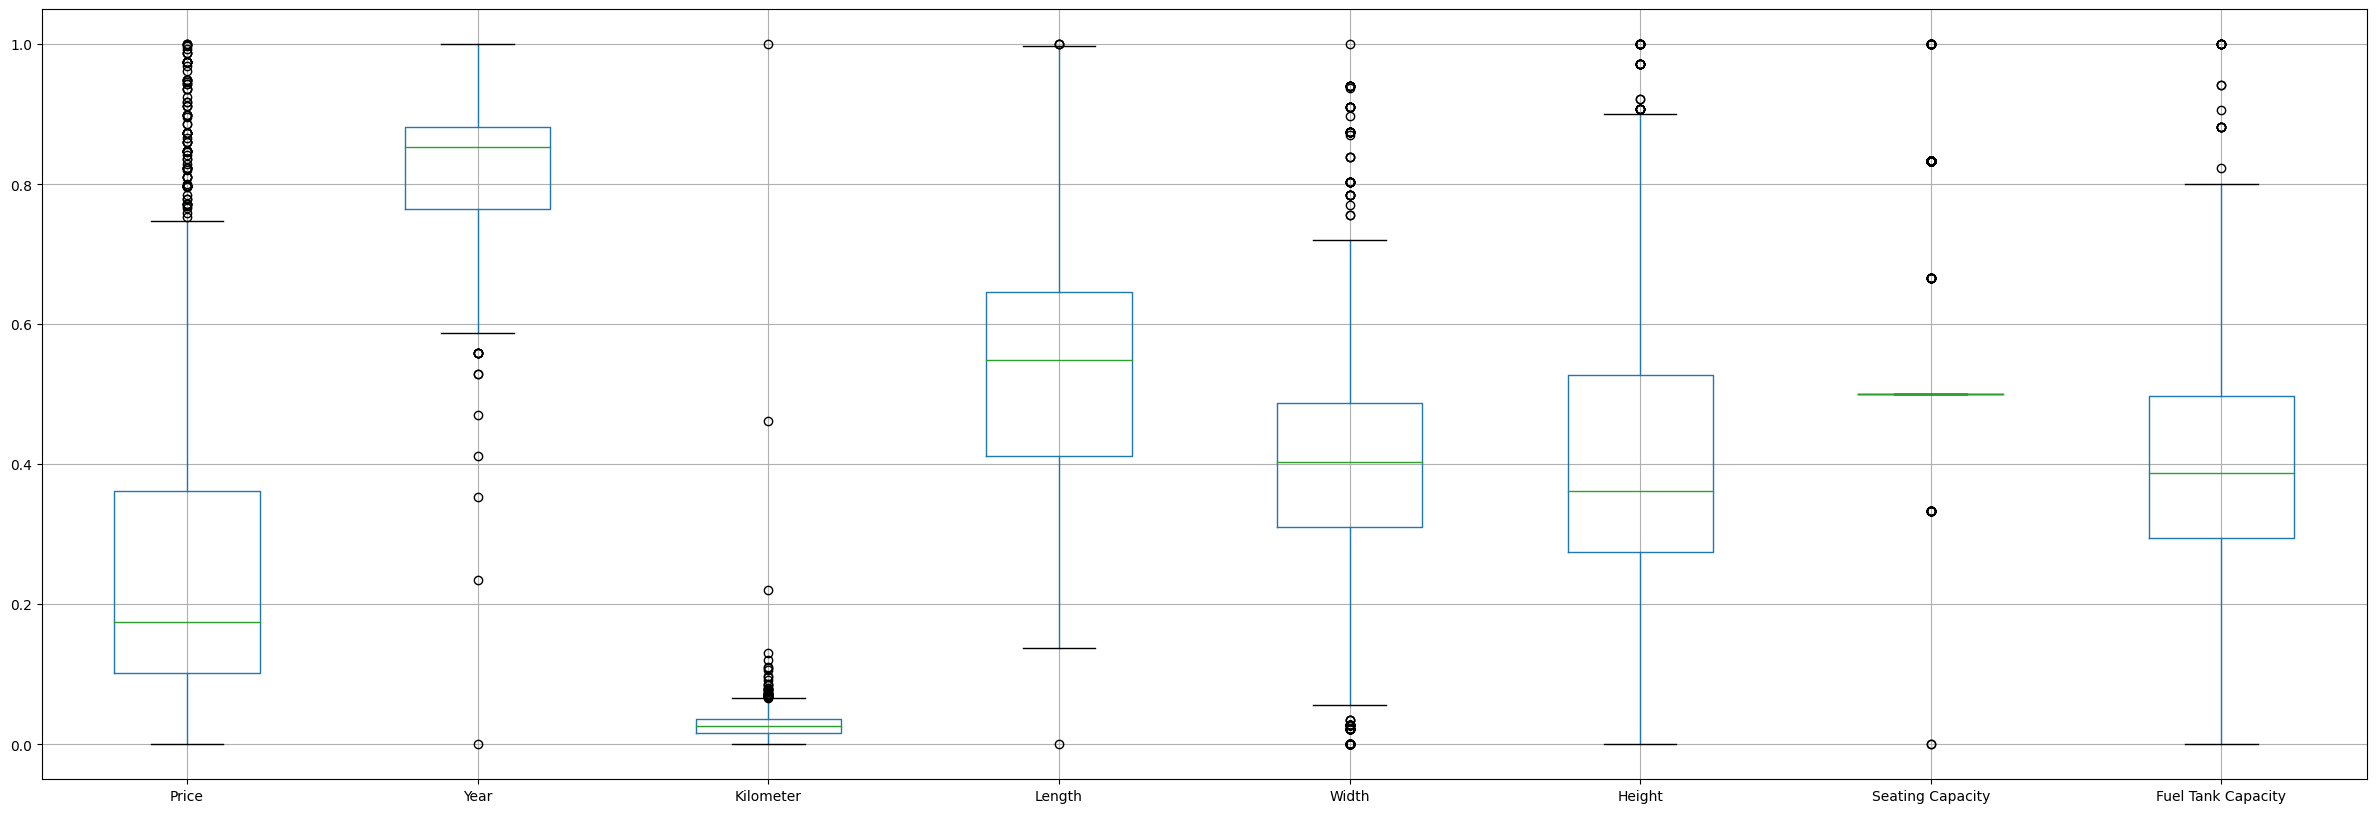

In [ ]:
car_data_fill_na_no_outliers.boxplot(figsize=(30,10))
plt.savefig(os.path.join("graficos", "boxplot_normalizado_sin_outliers.png"))
plt.show()

## Transformacion de data categorica

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', use_cat_names=True, cols = ["Make", "Fuel Type", "Transmission", "Owner"])

encoder.fit(car_data_notna)

car_data_notna = encoder.transform(car_data_notna)

In [ ]:
encoder.fit(car_data_fill_na)

car_data_fill_na = encoder.transform(car_data_fill_na)

In [ ]:
encoder.fit(car_data_fill_na_no_outliers)

car_data_fill_na_no_outliers = encoder.transform(car_data_fill_na_no_outliers)

In [ ]:
encoder.fit(car_data_notna_no_outliers)

car_data_notna_no_outliers = encoder.transform(car_data_notna_no_outliers)

In [ ]:
car_data_notna.to_csv("car_data_notna.csv")
car_data_fill_na.to_csv("car_data_fill_na.csv")
car_data_fill_na_no_outliers.to_csv("car_data_fill_na_no_outliers.csv")
car_data_notna_no_outliers.to_csv("car_data_notna_no_outliers.csv")